In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("static-data_ncop.csv")

df_logistic = pd.read_csv("QOEALL - Sheet1.csv")

/var/folders/99/0yd48j791r3041y4rjsmf0t40000gn/T/ipykernel_7965/1176006284.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("static-data_ncop.csv")


In [3]:
df.head()

,Seg_#,Arr_time,Del_Time,Stall_Dur,Rep_Level,Del_Rate,Act_Rate,Byte_Size,Buff_Level,Algorithm,...,Protocol,P.1203,Clae,Duanmu,Yin,Yu,folder_name,host,band,delay
0,1,152,152,0,239,112,8,2132,2000.0,arbiter,...,HTTP/1.1,1.878,0.00,1726.005,239515.0,233515.0,_host_10_band_5.0_delay_10_ploss_0.0,10,5,10
1,2,3295,1957,0,239,337,329,82445,4000.0,arbiter,...,HTTP/1.1,1.878,0.48,1721.405,239515.0,467030.0,_host_10_band_5.0_delay_10_ploss_0.0,10,5,10
2,3,6033,2176,0,239,430,468,117046,3262.0,arbiter,...,HTTP/1.1,1.878,0.48,1721.405,239515.0,706545.0,_host_10_band_5.0_delay_10_ploss_0.0,10,5,10
3,4,8785,2177,0,239,397,432,108123,2511.0,arbiter,...,HTTP/1.1,1.878,0.48,1721.405,239515.0,946060.0,_host_10_band_5.0_delay_10_ploss_0.0,10,5,10
4,5,11056,1692,0,239,320,270,67720,2240.0,arbiter,...,HTTP/1.1,1.878,0.48,1721.405,239515.0,1185575.0,_host_10_band_5.0_delay_10_ploss_0.0,10,5,10


In [4]:
df['Algorithm'].unique()

array(['arbiter', 'elastic', 'bba', nan, 'conventional', 'exponential'],
      dtype=object)

In [5]:
df.shape

(78979, 27)

In [6]:
df = df.dropna(subset=['Algorithm'])

In [7]:
df.shape

(78969, 27)

In [8]:
df['Algorithm'].unique()

array(['arbiter', 'elastic', 'bba', 'conventional', 'exponential'],
      dtype=object)

In [9]:
bba = df[df['Algorithm']=='bba']
arbiter = df[df['Algorithm']=='arbiter']
elastic = df[df['Algorithm']=='elastic']
conventional = df[df['Algorithm']=='conventional']
exponential = df[df['Algorithm']=='exponential']
exponential = df[df['Algorithm']=='exponential']
logistic = df_logistic[df_logistic['Algo']=='logistic']
# logistic.to_csv("logistic.csv",index=False);

In [10]:
#fair comparison - drop bba from 13 seg and after 30.

In [11]:
# Convert Seg_# to numeric safely
bba.loc[:, 'Seg_#'] = pd.to_numeric(bba['Seg_#'], errors='coerce')

# Filter rows Seg_# 14–30
bba_filtered = bba[(bba['Seg_#'] >= 14) & (bba['Seg_#'] <= 30)].reset_index(drop=True)

print(bba_filtered.shape)

(4570, 27)


In [12]:
bba_filtered = bba_filtered[['Seg_#','Algorithm','host',	'band',	'delay','P.1203']]
bba_filtered.head()

,Seg_#,Algorithm,host,band,delay,P.1203
0,14,bba,10,5,10,1.271
1,15,bba,10,5,10,1.266
2,16,bba,10,5,10,1.260
3,17,bba,10,5,10,1.255
4,18,bba,10,5,10,1.250


In [14]:
df_logistic=logistic[['IntSeg','Algo','Competitions','Bandwidth','Delay','P1203']]
df_logistic = df_logistic.rename(columns={
    'IntSeg': 'Seg_#',
    'Algo': 'Algorithm',
    'Competitions': 'host',
    'Bandwidth': 'band',
    'Delay': 'delay',
    'P1203':'P.1203'
})
df_logistic.head()

,Seg_#,Algorithm,host,band,delay,P.1203
9180,14.0,logistic,5,5,100,1.740
9181,15.0,logistic,5,5,100,1.686
9182,16.0,logistic,5,5,100,1.645
9183,17.0,logistic,5,5,100,1.599
9184,18.0,logistic,5,5,100,1.562


In [15]:
arb_ela = df[(df['Algorithm']=='arbiter') | (df['Algorithm']=='elastic')]
con_exp = df[(df['Algorithm']=='conventional') | (df['Algorithm']=='exponential')]

bba_logistic = pd.concat([bba_filtered, df_logistic], ignore_index=True)

In [16]:
print(bba.shape, arbiter.shape,elastic.shape,conventional.shape,exponential.shape, logistic.shape)

(15151, 27) (15889, 27) (16065, 27) (15817, 27) (16047, 27) (4590, 12)


In [17]:
print(arb_ela.shape, con_exp.shape, bba_logistic.shape)

(31954, 27) (31864, 27) (9160, 6)


In [18]:
# arbiter.groupby(['host', 'band','delay']).size().reset_index(name='count')

In [19]:
best_arb_ela = arb_ela[(arb_ela['band']==15) & (arb_ela['delay']==10)]
worst_arb_ela = arb_ela[(arb_ela['band']==5) & (arb_ela['delay']==100)]

best_con_exp = con_exp[(con_exp['band']==15) & (con_exp['delay']==10)]
worst_con_exp = con_exp[(con_exp['band']==5) & (con_exp['delay']==100)]

# Buffered

best_bba_log = bba_logistic[(bba_logistic['band']==15) & (bba_logistic['delay']==10)]
worst_bba_log= bba_logistic[(bba_logistic['band']==5) & (bba_logistic['delay']==100)]

# best_bba_log.to_csv("best_bba.csv");

In [20]:
print(best_arb_ela.shape, worst_arb_ela.shape, best_con_exp.shape, worst_con_exp.shape, best_bba_log.shape, worst_bba_log.shape)

(3568, 27) (3600, 27) (3600, 27) (3600, 27) (1020, 6) (1015, 6)


In [21]:
import pandas as pd
import numpy as np

def compute_percentiles(df, value_col='P.1203', group_cols=['host','Algorithm'], percentiles=np.arange(10, 100, 10)):
    """
    Compute percentiles for a specified column grouped by given columns,
    and return a long-format DataFrame suitable for plotting.
    
    Parameters:
        df (pd.DataFrame): Input dataframe.
        value_col (str): Column for which percentiles are computed.
        group_cols (list): Columns to group by.
        percentiles (array-like): Percentiles to compute (0-100).
        
    Returns:
        pd.DataFrame: Long-format DataFrame with columns [group_cols..., percentile, value]
    """
    # Compute percentiles
    result = (
        df.groupby(group_cols)[value_col]
          .quantile(percentiles / 100)
          .unstack()
    )

    # Rename columns to numeric percentiles
    result.columns = [int(p) for p in percentiles]

    # Reset index to get group columns as regular columns
    result = result.reset_index()

    # Sort for clean output
    result = result.sort_values(group_cols).reset_index(drop=True)

    # Convert to long format
    df_long = result.melt(
        id_vars=group_cols,
        var_name='percentile',
        value_name='value'
    )

    return df_long

In [22]:
df_best_arb_ela = compute_percentiles(best_arb_ela)
df_worst_arb_ela = compute_percentiles(worst_arb_ela)


df_best_con_exp = compute_percentiles(best_con_exp)
df_worst_con_exp = compute_percentiles(worst_con_exp)

df_best_bba_log = compute_percentiles(best_bba_log)
df_worst_bba_log = compute_percentiles(worst_bba_log)


print(df_best_arb_ela.shape, df_worst_arb_ela.shape, df_best_con_exp.shape, df_worst_con_exp.shape, df_best_bba_log.shape,df_worst_bba_log.shape)

(54, 4) (54, 4) (54, 4) (54, 4) (54, 4) (54, 4)


In [45]:
# df_best_bba_log

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_facet_scatter(df, col='Algorithm', hue='host', facet_titles=['Arbiter', 'Elastic'],
                       xlabel='Percentile', ylabel='Value', filename='plot.pdf'):
    
    # Create FacetGrid
    g = sns.FacetGrid(df, col=col, hue=hue, hue_kws={"marker": ["*", "o", "x"]})
    g.map(plt.scatter, "percentile", "value")
    g.add_legend(title='Nodes')
    
    # Set titles directly
    g.axes[0,0].set_title(facet_titles[0])
    g.axes[0,1].set_title(facet_titles[1])
    
    # Set axis labels
    g.set_axis_labels(xlabel, ylabel)
    
    # Set x-ticks for percentiles 10-90
    g.set(xticks=range(10, 100, 10))
    
    # Save figure
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

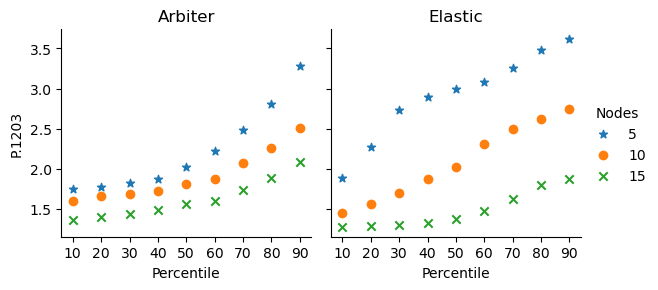

In [39]:
plot_facet_scatter(
    df_best_arb_ela,
    col='Algorithm',
    hue='host',
    facet_titles=['Arbiter', 'Elastic'],
    xlabel='Percentile',
    ylabel='P.1203',filename='arb_ela_best.pdf'
)

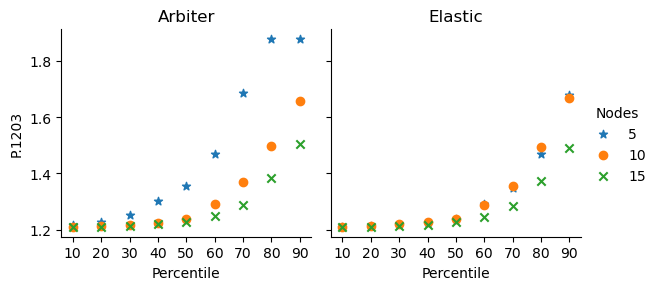

In [40]:
plot_facet_scatter(
    df_worst_arb_ela,
    col='Algorithm',
    hue='host',
    facet_titles=['Arbiter', 'Elastic'],
    xlabel='Percentile',
    ylabel='P.1203',filename='arb_ela_worst.pdf'
)

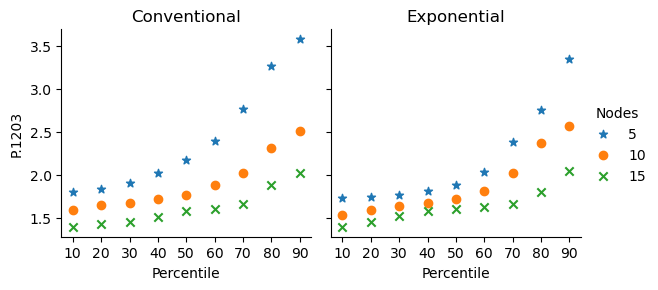

In [41]:
plot_facet_scatter(
    df_best_con_exp,
    col='Algorithm',
    hue='host',
    facet_titles=['Conventional', 'Exponential'],
    xlabel='Percentile',
    ylabel='P.1203',filename='con_exp_best.pdf'
)

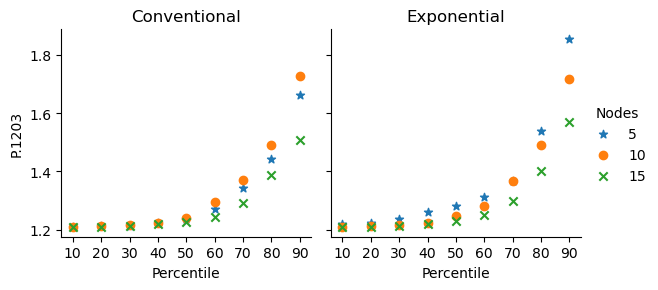

In [42]:
plot_facet_scatter(
    df_worst_con_exp,
    col='Algorithm',
    hue='host',
    facet_titles=['Conventional', 'Exponential'],
    xlabel='Percentile',
    ylabel='P.1203',filename='con_exp_worst.pdf'
)

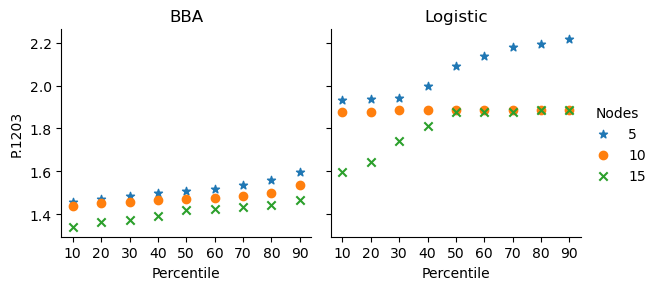

In [43]:
plot_facet_scatter(
    df_best_bba_log,
    col='Algorithm',
    hue='host',
    facet_titles=['BBA', 'Logistic'],
    xlabel='Percentile',
    ylabel='P.1203',filename='bba_log_best.pdf'
)

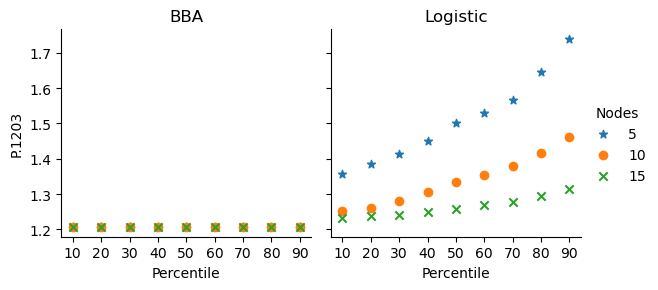

In [44]:
plot_facet_scatter(
    df_worst_bba_log,
    col='Algorithm',
    hue='host',
    facet_titles=['BBA', 'Logistic'],
    xlabel='Percentile',
    ylabel='P.1203',filename='bba_log_worst.pdf'
)